In [21]:
import pandas as pd
import numpy as np
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from tqdm.auto import tqdm

In [2]:
transactions = pd.read_csv("data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/transaction_data.csv")

In [115]:
households = pd.read_csv("data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/hh_demographic.csv")

In [29]:
top = transactions.groupby("PRODUCT_ID").apply(len).sort_values(ascending=False).head(40)
top.to_dict()

{1082185: 29778,
 6534178: 19820,
 1029743: 14430,
 995242: 12542,
 1106523: 9826,
 981760: 9126,
 1133018: 7315,
 883404: 6904,
 951590: 6138,
 826249: 5505,
 840361: 5338,
 1127831: 5271,
 995785: 5174,
 1098066: 5040,
 908531: 5028,
 860776: 4904,
 5978656: 4887,
 904360: 4873,
 923746: 4857,
 5569230: 4834,
 961554: 4806,
 1005186: 4653,
 849843: 4616,
 1126899: 4484,
 1070820: 4440,
 916122: 4415,
 854852: 4112,
 862349: 4109,
 1058997: 4096,
 1044078: 4058,
 844179: 3941,
 866211: 3667,
 878996: 3613,
 1004906: 3603,
 859075: 3484,
 1081177: 3396,
 1053690: 3394,
 834484: 3302,
 994928: 3252,
 986912: 3221}

In [10]:
df = pd.DataFrame()
df["a"] = [1]

In [12]:
df["b"] = [2]

In [13]:
df

,a,b
0,1,2


In [93]:
features = top.to_dict()

In [94]:
def compute_features(data):
    df = pd.DataFrame()
    for i, count in features.items():
        df["f"+str(i)] = [(data["PRODUCT_ID"] == i).sum() / float(count)]
    return df

In [95]:
tqdm.pandas("applying")

/home/radeusgd/Anaconda3/envs/ada/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [96]:
embedding = transactions.groupby("household_key").progress_apply(compute_features)

In [100]:
embedding = embedding.droplevel(1)
embedding

,f1082185,f6534178,f1029743,f995242,f1106523,f981760,f1133018,f883404,f951590,f826249,...,f844179,f866211,f878996,f1004906,f859075,f1081177,f1053690,f834484,f994928,f986912
household_key,,,,,,,,,,,,,,,,,,,,,
1,0.001377,0.000000,0.000139,0.002791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003053,0.000000,0.000589,0.000000,0.000303,0.000000,0.00031
2,0.000067,0.000000,0.000000,0.000000,0.000814,0.000000,0.001230,0.000145,0.000815,0.000182,...,0.000000,0.000545,0.000000,0.000555,0.000000,0.000589,0.001179,0.000000,0.000615,0.00000
3,0.000302,0.000050,0.000000,0.000000,0.001119,0.000000,0.000684,0.000435,0.002281,0.000363,...,0.000254,0.000545,0.000554,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000139,0.000000,0.000000,0.000000,0.000000,0.000579,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000287,0.000000,0.000000,0.000303,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0.000269,0.000706,0.000000,0.000000,0.001527,0.002411,0.001230,0.002607,0.000000,0.001817,...,0.001776,0.000000,0.000000,0.000000,0.000574,0.000000,0.000000,0.000606,0.000000,0.00000
2497,0.000403,0.000252,0.000762,0.000638,0.000000,0.000219,0.000000,0.000869,0.000978,0.000182,...,0.000761,0.000818,0.000830,0.001388,0.000574,0.002061,0.000295,0.004240,0.001230,0.00031
2498,0.000336,0.000000,0.000069,0.000000,0.000509,0.000000,0.000000,0.000000,0.000326,0.000908,...,0.000000,0.000000,0.000277,0.000000,0.000000,0.000000,0.002357,0.000303,0.000615,0.00031


In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components=2)

In [103]:
reduced = pca.fit_transform(embedding)

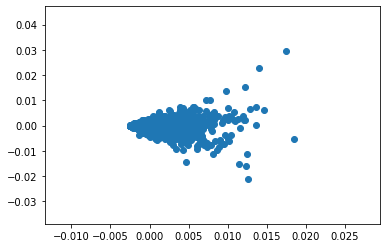

In [104]:
plt.scatter(reduced[:,0], reduced[:,1])

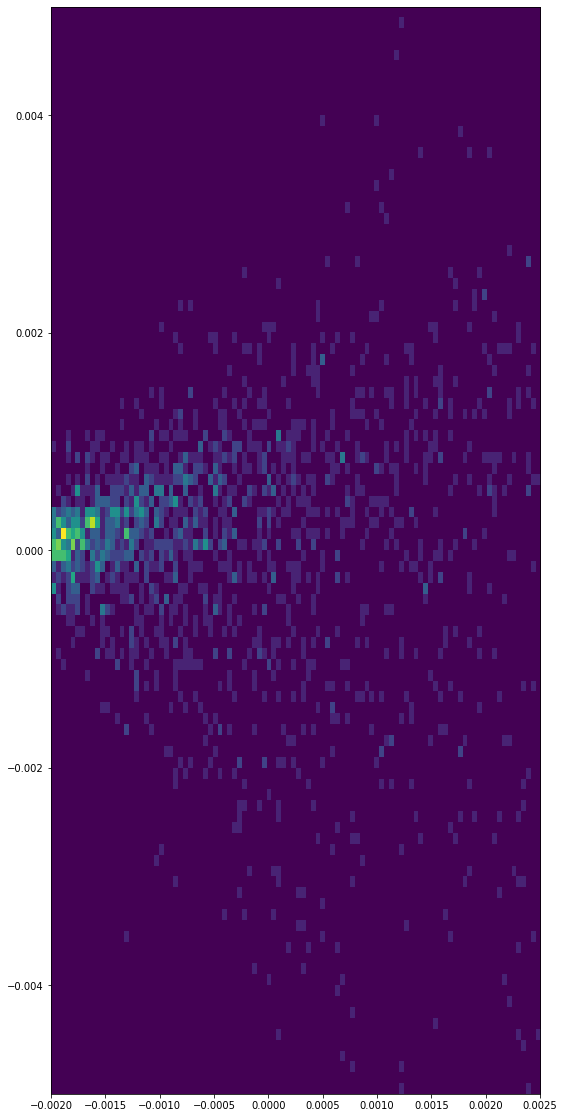

In [105]:
heatmap, xedges, yedges = np.histogram2d(reduced[:,0], reduced[:,1], bins=100, range=[[-0.002, 0.0025], [-0.005, 0.005]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(20,20))
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [106]:
from sklearn.cluster import KMeans, DBSCAN

In [107]:
db = DBSCAN(eps=0.05)

In [108]:
clusters = db.fit_predict(embedding)

In [165]:
kmeans = KMeans(n_clusters=4)

In [166]:
clusters = kmeans.fit_predict(embedding)

In [167]:
merged = embedding.copy()

In [168]:
merged["kmeans_cluster"] = clusters

In [169]:
merged["PCA_x"] = reduced[:,0]
merged["PCA_y"] = reduced[:,1]

In [170]:
merged = merged.merge(households, left_index=True, right_on="household_key")

In [171]:
merged

,f1082185,f6534178,f1029743,f995242,f1106523,f981760,f1133018,f883404,f951590,f826249,...,PCA_x,PCA_y,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,0.001377,0.000000,0.000139,0.002791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000011,0.000245,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,0.000940,0.000000,0.000139,0.000080,0.001119,0.000000,0.000684,0.000000,0.000000,0.000182,...,-0.000484,-0.000576,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,0.001041,0.000303,0.000624,0.000319,0.000814,0.000548,0.001367,0.000435,0.000163,0.000182,...,0.002277,0.001317,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,0.001142,0.004036,0.004158,0.003030,0.000712,0.000000,0.001094,0.000000,0.002933,0.002180,...,0.004498,-0.001177,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.002492,-0.000015,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.000470,0.000252,0.000069,0.000000,0.000000,0.000110,0.000000,0.000000,0.000000,0.000182,...,-0.000526,-0.000752,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,0.000269,0.000706,0.000000,0.000000,0.001527,0.002411,0.001230,0.002607,0.000000,0.001817,...,0.002383,0.000554,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,0.000403,0.000252,0.000762,0.000638,0.000000,0.000219,0.000000,0.000869,0.000978,0.000182,...,0.003754,-0.001189,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,0.000336,0.000000,0.000069,0.000000,0.000509,0.000000,0.000000,0.000000,0.000326,0.000908,...,0.000161,-0.000872,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


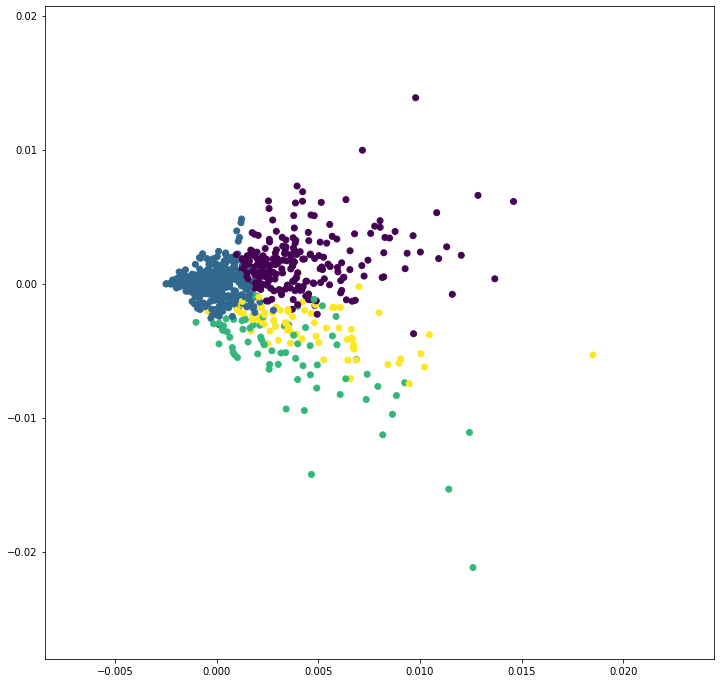

In [173]:
plt.figure(figsize=(12,12))
plt.scatter(merged["PCA_x"], merged["PCA_y"], c=merged["kmeans_cluster"])

In [156]:
def colorize(data):
    vals = data.unique()
    mapping = {}
    for i,v in enumerate(vals):
        mapping[v]=i
    return data.apply(lambda v: mapping[v])

In [134]:
(1)

(0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0)

In [181]:
def scatter_by(cat):
    plt.figure(figsize=(12,12))
    vals = sorted(merged[cat].unique())
    cmap = matplotlib.cm.get_cmap("Set1")
    for i,val in enumerate(vals):
        flt = merged[merged[cat] == val]
        plt.scatter(flt["PCA_x"], flt["PCA_y"], c=[cmap(i)], label=val, alpha=0.5)
    plt.legend()
    plt.show()

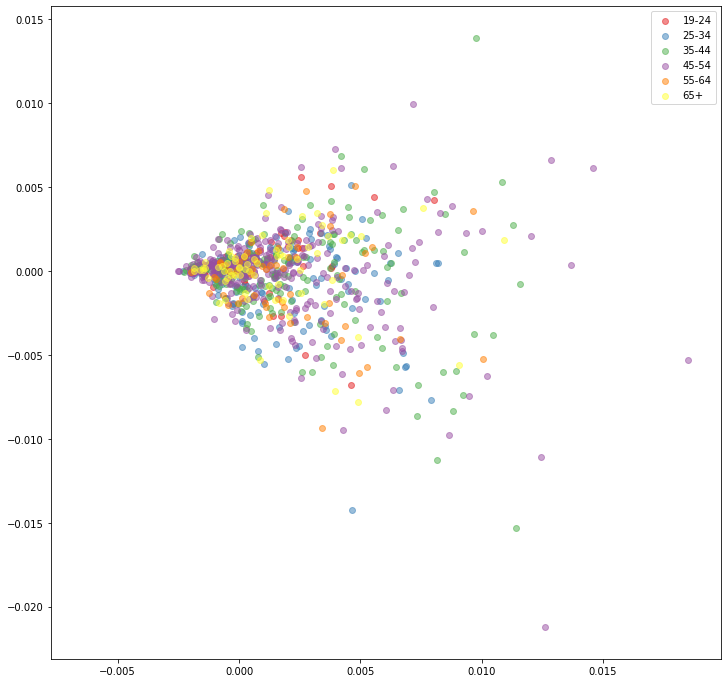

In [182]:
scatter_by("AGE_DESC")

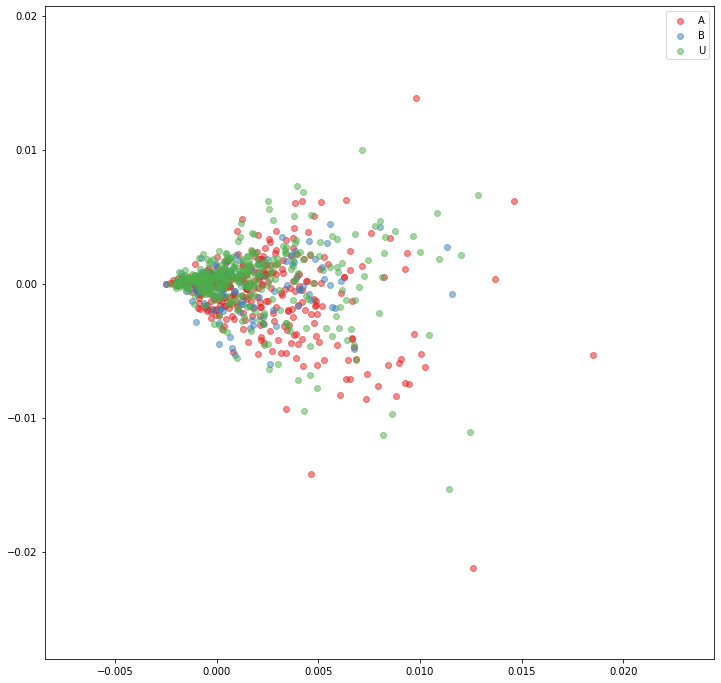

In [183]:
scatter_by("MARITAL_STATUS_CODE")

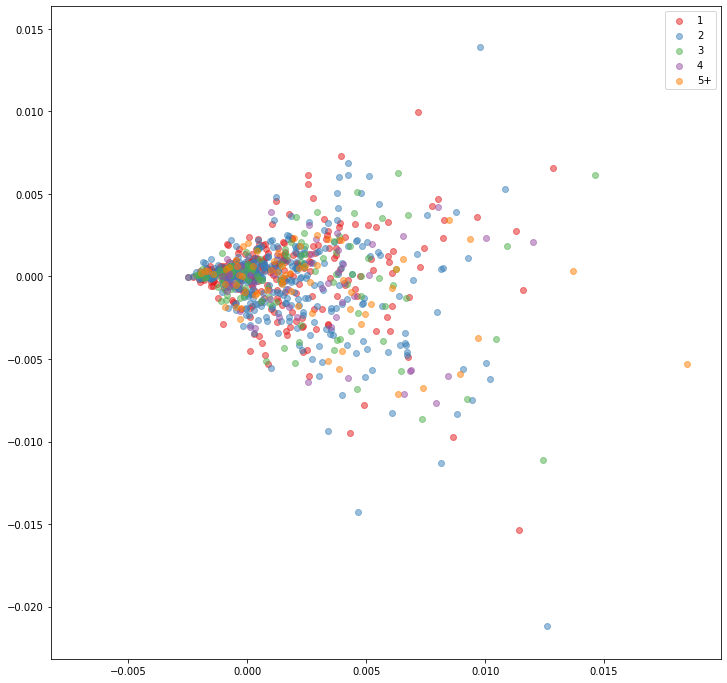

In [185]:
scatter_by("HOUSEHOLD_SIZE_DESC")